## Welcome to FastHawkes

In this brief introduction, we provide an example for the use of the code.

In [1]:
import sys
sys.path.append("/home/caner/code/hawkes_bound")

In [2]:
%matplotlib inline
import numpy as np
from fasthawkes.em import hawkes_em, hawkes_perplexity
from matplotlib import pyplot as plt

First, let's see how the data is formatted. The CSV data should compose of two integer columns: corresponding to the 'mark' of the event and its timestamp. Timestamps should be in sorted order and based off of 0. Marks should range from 0 to the maximum mark, with no empty marks in between. The file should have no headers:

In [3]:
!head -n15 example_data.csv

21,30
21,45
15,56
13,56
21,57
9,59
13,67
15,67
9,70
13,79
21,82
10,87
13,91
21,95
9,95


Maximum likelihood parameter estimation is performed with `hawkes_em`.

In [4]:
print hawkes_em.__doc__


    Function implementing the E-M algorithm for bounded delay Hawkes processes.
    The function accepts the filename where formatted CSV data is available,
    returns and calculates the parameter vectors lambda, Phi and beta.

    Optionally, starting vectors can be provided.

    The function supports multithreading for significantly faster computation. Furthermore,
    compute-intensive portions of the E-step are compiled to pure C.

    :param data_filename: full absolute path to a data file. Data should be formatted as
        a CSV file of two items: the 'mark' of the event, and the timestamp of the event.
        Both items should be integers. Timestamps are assumed to start from 0. The CSV file
        should have no headers.
    :param tmax: the maximum lookback period, or the delay bound for the Hawkes model
    :param maxiter: maximum number of EM iterations allowed
    :param n_threads: number of threads to compute with
    :param lda0: optional, initial value for the lam

In [5]:
l, P, b = hawkes_em("example_data.csv", tmax=1000, maxiter=10, n_threads=3)

Retrieved data (N, maxcode): 99999 21
-384737.995914
-321813.276246
-293329.596575
-279696.005631
-272971.560507
-269447.903597
-267476.109378
-266306.469671
-265577.77394
-265105.054846


Perplexity can be calculated with `hawkes_perplexity`.

In [6]:
print hawkes_perplexity.__doc__


    Function implementing the E-M algorithm for bounded delay Hawkes processes.
    The function accepts the filename where formatted CSV data is available,
    returns and calculates the parameter vectors lambda, Phi and beta.

    Optionally, starting vectors can be provided.

    Supports multithreading as the perplexity calculation can be computationally
    intensive.

    :param data_filename: full absolute path to a data file. Data should be formatted as
        a CSV file of two items: the 'mark' of the event, and the timestamp of the event.
        Both items should be integers. Timestamps are assumed to start from 0. The CSV file
        should have no headers.
    :param tmax: the maximum lookback period, or the delay bound for the Hawkes model
    :param lda: the lambda parameter
    :param Phi: Phi parameter
    :param beta: beta parameter

    :returns: double, the predictive perplexity of the data set under lambda, Phi, beta provided
    


In [7]:
hawkes_perplexity("example_data.csv",1000, l, P, b)

Retrieved data (N, maxcode): 99999 21


0.017086577126281283

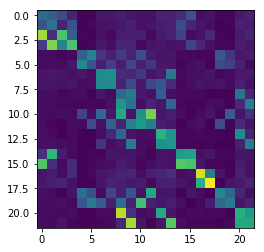

In [9]:
plt.imshow(P)